# MAGs

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [2]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 10)

## Imports

In [3]:
metrics = pd.read_csv("../../1_Dataset_creation/Dataset.csv")
metrics = metrics.rename(columns={"Genome_ID":"Assembly accession"})
metrics.head(2)

,Assembly accession,Bin_Id,Marker lineage,Completeness,Contamination,Strain_heterogeneity,Quality_score,classification,Domain,Phyla,Class,Order,Family,Genus,Species,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,Classification_quality
0,GCA_000016645.1,GCA_000016645.1_ASM1664v1_genomic,f__Flavobacteriaceae (UID2817),99.65,0.14,0.0,98.95,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Flavobacterium,Flavobacterium johnsoniae,1,1,6096872,6096872,0.0,1,6096872,1,6096872,1,6096872,1,6096872,6096872,6096872,1,100.0,0.34113,0.0,High
1,GCA_000023285.1,GCA_000023285.1_ASM2328v1_genomic,p__Bacteroidetes (UID2605),100.00,0.00,0.0,100.00,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Capnocytophaga,Capnocytophaga ochracea,1,1,2612925,2612925,0.0,1,2612925,1,2612925,1,2612925,1,2612925,2612925,2612925,1,100.0,0.39588,0.0,High


In [4]:
metadata = pd.read_csv("../../2_Metadata/Metadata_final.csv")
metadata.head(2)

,Assembly accession,ASM name,Alias,Altitude,Anonymized name,Arrayexpress species,Arrayexpress strain or line,Assembly level,Assembly method,Biomaterial provider,Bioproject accession,Biosample accession,Biosample model,Biosample title,Biotic relationship,Body sample site,Cell shape,Collected by,Collection date,Comment paragraph,Completion date,Contact email,Contact lab,Contigs,Country,Culture collection,Depth,Derived from,Description,Disease,ENA checklist,ENA-first-public,ENA-last-update,Elevation,Env biome,Env broad scale,Env feature,Env local scale,Env material,Env medium,Environment,Environmental sample,Estimated size,Excluded from refseq,FDA cvm ID,Finishing strategy (depth of coverage),First name,Ftp path,GOLD stamp ID,Gbrs paired ASM,Genbank accessions,Gene calling method,Genome name,Genome quality flags,Genome rep,Genome status,Genotype,Geographic location,Geographic location (city),Geographic location (country or region),Gram stain,Habitat,Host,Host age,Host disease,Host disease outcome,Host gender,Host health,Host name,Host scientific name,Host sex,Host taxid,Host tissue sampled,INSDC center alias,INSDC center name,INSDC first public,INSDC last update,INSDC status,Identification method,Identified by,Infraspecific name,Investigation type,Isol growth condt,Isolate,Isolation comments,Isolation country,Isolation site,Isolation source,Last name,Latitude,Locus tag prefix,Longitude,MLST,Mapping method and version,Material,Metagenome source,Misc param,Misc param: hmp supersite,Motility,Name,Ncbi taxon ID,Note,Organism,Organism name,Other clinical,Other environmental,Oxygen requirement,Paired ASM comp,Phenotypes,Plasmids,Project name,Project type,Publication,Publication date,Ref biomaterial,Refseq accessions,Refseq category,Refseq cds,Rel to oxygen,Relation to type material,Release type,SRA accession,Salinity,Sample accession,Sample name,Sample type,Seq rel date,Sequencing centers,Sequencing depth,Sequencing method,Sequencing platform,Sequencing platform resumed,Sequencing status,Source mat ID,Species taxid,Specific host,Sporulation,Strain,Strain name alias,Subject ID,Submission model,Submission package,Submitter,Subsrc note,Supplier name,Taxid,Temperature,Temperature optimum,Temperature range,Title,Trophic level,Type material,Type strain,Value,Version status,WGS master,pH,Terrestrial_coordinates,MAG,Origin
0,GCA_000016645.1,ASM1664v1,NaN,NaN,NaN,NaN,NaN,Complete Genome,NaN,NaN,PRJNA16082,SAMN02598357,NaN,Sample from Flavobacterium johnsoniae UW101,NaN,NaN,Rod,NaN,NaN,Flavobacterium johnsoniae ATCC 17061. Flavobac...,2007-05-01T00:00:00Z,NaN,NaN,1.0,NaN,ATCC 17061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,GCF_000016645.1,CP000685,NaN,Flavobacterium johnsoniae UW101,NaN,Full,Complete,NaN,United Kingdom: England,England,United Kingdom,NaN,Multiple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strain=UW101; ATCC 17061,NaN,NaN,NaN,isolated from soil in England and is the type ...,United Kingdom,NaN,soil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NCBI,376686.0,NaN,Flavobacterium johnsoniae UW101,Flavobacterium johnsoniae UW101,NaN,NaN,Aerobic,identical,NaN,NaN,NaN,NaN,NaN,2014-01-28T00:00:00.000,NaN,NC_009441,representative genome,5017.0,NaN,assembly from type material,Major,NaN,Non-halophilic,SAMN02598357,CP000685,NaN,2007/05/01,DOE Joint Genome Institute,NaN,NaN,NaN,NaN,complete,NaN,986.0,NaN,No,ATCC 17061,NaN,NaN,Generic,Generic.1.0,US DOE Joint Genome Institute,NaN,NaN,376686.0,NaN,20-30,Mesophilic,NaN,NaN,type strain of Flavobacterium johnsoniae,Yes,NaN,latest,NaN,NaN,NaN,False,Non_marine
1,GCA_000023285.1,ASM2328v1,NaN,NaN,NaN,NaN,NaN,Complete Genome,NaN,NaN,PRJNA29403,SAMN00001911,NaN,Generic sample from Capnocytophaga ochracea DS...,NaN,NaN,Rod,NaN,NaN,Capnocytophaga ochracea DSM 7271,2009-04-30T00:00:00Z,NaN,NaN,1.0,NaN,DSM 7271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
statistics = pd.read_csv("../../3_Annotation/Statistics.csv")
statistics = statistics.rename(columns={"Unnamed: 0":"Assembly accession"})
statistics.head(2)

,Assembly accession,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%
0,GCA_002431085.1,2758,4628,1162,1809,47,42.131980,65.591008,1.704133
1,GCA_002302445.1,2226,3776,859,1364,65,38.589398,61.275831,2.920036


### Merge

In [6]:
dataset = pd.merge(metrics, statistics, how="left", left_on="Assembly accession", right_on="Assembly accession", indicator="merge")
dataset = pd.merge(dataset, metadata, how="left", left_on="Assembly accession", right_on="Assembly accession", indicator="merge2")
dataset.drop(columns=["merge", "merge2"], inplace=True)
#dataset["merge"].value_counts()
#dataset["merge2"].value_counts()
dataset.head(2)

,Assembly accession,Bin_Id,Marker lineage,Completeness,Contamination,Strain_heterogeneity,Quality_score,classification,Domain,Phyla,Class,Order,Family,Genus,Species,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,Classification_quality,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,ASM name,Alias,Altitude,Anonymized name,Arrayexpress species,Arrayexpress strain or line,Assembly level,Assembly method,Biomaterial provider,Bioproject accession,Biosample accession,Biosample model,Biosample title,Biotic relationship,Body sample site,Cell shape,Collected by,Collection date,Comment paragraph,Completion date,Contact email,Contact lab,Contigs,Country,Culture collection,Depth,Derived from,Description,Disease,ENA checklist,ENA-first-public,ENA-last-update,Elevation,Env biome,Env broad scale,Env feature,Env local scale,Env material,Env medium,Environment,Environmental sample,Estimated size,Excluded from refseq,FDA cvm ID,Finishing strategy (depth of coverage),First name,Ftp path,GOLD stamp ID,Gbrs paired ASM,Genbank accessions,Gene calling method,Genome name,Genome quality flags,Genome rep,Genome status,Genotype,Geographic location,Geographic location (city),Geographic location (country or region),Gram stain,Habitat,Host,Host age,Host disease,Host disease outcome,Host gender,Host health,Host name,Host scientific name,Host sex,Host taxid,Host tissue sampled,INSDC center alias,INSDC center name,INSDC first public,INSDC last update,INSDC status,Identification method,Identified by,Infraspecific name,Investigation type,Isol growth condt,Isolate,Isolation comments,Isolation country,Isolation site,Isolation source,Last name,Latitude,Locus tag prefix,Longitude,MLST,Mapping method and version,Material,Metagenome source,Misc param,Misc param: hmp supersite,Motility,Name,Ncbi taxon ID,Note,Organism,Organism name,Other clinical,Other environmental,Oxygen requirement,Paired ASM comp,Phenotypes,Plasmids,Project name,Project type,Publication,Publication date,Ref biomaterial,Refseq accessions,Refseq category,Refseq cds,Rel to oxygen,Relation to type material,Release type,SRA accession,Salinity,Sample accession,Sample name,Sample type,Seq rel date,Sequencing centers,Sequencing depth,Sequencing method,Sequencing platform,Sequencing platform resumed,Sequencing status,Source mat ID,Species taxid,Specific host,Sporulation,Strain,Strain name alias,Subject ID,Submission model,Submission package,Submitter,Subsrc note,Supplier name,Taxid,Temperature,Temperature optimum,Temperature range,Title,Trophic level,Type material,Type strain,Value,Version status,WGS master,pH,Terrestrial_coordinates,MAG,Origin
0,GCA_000016645.1,GCA_000016645.1_ASM1664v1_genomic,f__Flavobacteriaceae (UID2817),99.65,0.14,0.0,98.95,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Flavobacterium,Flavobacterium johnsoniae,1,1,6096872,6096872,0.0,1,6096872,1,6096872,1,6096872,1,6096872,6096872,6096872,1,100.0,0.34113,0.0,High,5192,8348,1843,3127,244,35.496918,60.227273,4.699538,ASM1664v1,NaN,NaN,NaN,NaN,NaN,Complete Genome,NaN,NaN,PRJNA16082,SAMN02598357,NaN,Sample from Flavobacterium johnsoniae UW101,NaN,NaN,Rod,NaN,NaN,Flavobacterium johnsoniae ATCC 17061. Flavobac...,2007-05-01T00:00:00Z,NaN,NaN,1.0,NaN,ATCC 17061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,GCF_000016645.1,CP000685,NaN,Flavobacterium johnsoniae UW101,NaN,Full,Complete,NaN,United Kingdom: England,England,United Kingdom,NaN,Multiple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strain=UW101; ATCC 17061,NaN,NaN,NaN,isolated from soil in England and is the type ...,United Kingdom,NaN,soil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NCBI,376686.0,NaN,Flavobacterium johnsoniae UW101,Flavobacteri

In [7]:
dataset_reduced = dataset.groupby(["Genus"]).filter(lambda x:x["Genus"].count()>7)

# Data exploration

In [8]:
dataset["MAG"].value_counts()

False    1988
True      692
Name: MAG, dtype: int64

In [9]:
dataset["MAG"].value_counts(normalize=True) * 100

False    74.179104
True     25.820896
Name: MAG, dtype: float64

In [10]:
dataset.groupby("MAG").describe()

Completeness                                                          \
             count       mean        std    min      25%     50%       75%   
MAG                                                                          
False       1988.0  99.363687   1.443371  72.67  99.2900  99.650  100.0000   
True         692.0  86.628902  12.383185  50.31  78.9425  90.495   97.4625   

             Contamination                                                     \
         max         count      mean       std  min   25%   50%     75%   max   
MAG                                                                             
False  100.0        1988.0  0.583692  0.726624  0.0  0.00  0.42  0.8300  8.97   
True   100.0         692.0  1.583049  1.745936  0.0  0.29  1.07  2.2125  9.68   

      Strain_heterogeneity                                                     \
                     count       mean        std  min  25%   50%   75%    max   
MAG                                                                             
False               1988.0   5.347681  18.041569  0.0  0.0  0.00   0.0  100.0   
True                 692.0  23.288280  30.400810  0.0  0.0  7.69  40.0  100.0   

      Quality_score                                                        \
              count       mean        std    min      25%    50%      75%   
MAG                                                                         
False        1988.0  96.445226   4.058941  55.15  95.0175  97.52  99.1000   
True          692.0  78.713656  14.811931  50.01  66.3900  80.27  92.1425   

             n_scaffolds                                                  \
         max       count        mean         std  min   25%   50%    75%   
MAG                                                                        
False  100.0      1988.0   51.932596   94.395993  1.0   7.0  29.0   60.0   
True   100.0       692.0  165.338150  180.808871  1.0  47.0  97.5  222.0   

              n_contigs                                                   \
          max     count        mean         std  min   25%    50%    75%   
MAG                                                                        
False  1512.0    1988.0   55.385815   97.433603  1.0   9.0   33.0   64.0   
True   1445.0     692.0  249.154624  356.171308  1.0  55.0  129.0  322.0   

              scaf_bp                                                    \
          max   count          mean           std        min        25%   
MAG                                                                       
False  1678.0  1988.0  3.868933e+06  9.634540e+05  1515248.0  3142742.0   
True   5612.0   692.0  2.747008e+06  1.050139e+06   569462.0  1854367.5   

                                        contig_bp                              \
             50%         75%        max     count          mean           std   
MAG                                                                             
False  3856579.5  4486833.75  7041311.0    1988.0  3.867621e+06  9.628547e+05   
True   2799624.5  3322207.00  7026888.0     692.0  2.733827e+06  1.046464e+06   

                                                              gap_pct  \
             min         25%        50%        75%        max   count   
MAG                                                                     
False  1515248.0  3139257.50  3856579.5  4485103.5  7041311.0  1988.0   
True    569462.0  1837204.25  2793944.5  3312493.5  6570299.0   692.0   

                                                            scaf_N50  \
           mean       std  min  25%    50%      75%     max    count   
MAG                                                                    
False  0.032878  0.253894  0.0  0.0  0.000  0.00500   8.133   1988.0   
True   0.510746  1.146249  0.0  0.0  0.057  0.54225  11.485    692.0   

                                                          scaf_L50  \
            mean        std  min  25%   50%    75%    max    count   
MAG   

In [11]:
# MEAN values
mag = dataset.groupby("MAG").mean().round(2).drop(columns=["Host taxid","Ncbi taxon ID","Plasmids","Refseq cds","Species taxid", "Contigs"])
mag.head()

,Completeness,Contamination,Strain_heterogeneity,Quality_score,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%
MAG,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,99.36,0.58,5.35,96.45,51.93,55.39,3868933.36,3867620.90,0.03,6.15,1241435.79,6.59,1146018.45,18.93,966322.12,20.41,894704.59,1499871.28,1402692.02,12.03,91.27,0.35,0.03,3444.44,5678.79,1312.32,2144.54,97.76,38.66,62.67,2.77
True,86.63,1.58,23.29,78.71,165.34,249.15,2747008.31,2733827.39,0.51,37.93,127339.00,49.17,105665.19,116.15,60578.00,154.55,51116.53,247385.69,212205.83,9.89,40.83,0.36,0.02,2498.99,4109.03,999.88,1589.74,60.39,41.75,65.25,2.34


### Average size of MAGs is smaller:

In [12]:
dataset.groupby("MAG").describe()["scaf_bp"]

,count,mean,std,min,25%,50%,75%,max
MAG,,,,,,,,
False,1988.0,3.868933e+06,9.634540e+05,1515248.0,3142742.0,3856579.5,4486833.75,7041311.0
True,692.0,2.747008e+06,1.050139e+06,569462.0,1854367.5,2799624.5,3322207.00,7026888.0


In [13]:
dataset.groupby("MAG").describe()["Completeness"].round(0)

,count,mean,std,min,25%,50%,75%,max
MAG,,,,,,,,
False,1988.0,99.0,1.0,73.0,99.0,100.0,100.0,100.0
True,692.0,87.0,12.0,50.0,79.0,90.0,97.0,100.0


In [14]:
dataset.groupby("MAG").describe()["Contamination"].round(2)

,count,mean,std,min,25%,50%,75%,max
MAG,,,,,,,,
False,1988.0,0.58,0.73,0.0,0.00,0.42,0.83,8.97
True,692.0,1.58,1.75,0.0,0.29,1.07,2.21,9.68


In [15]:
dataset.groupby("MAG").describe()["Orfs_anno_cazymes%"].round(2)

,count,mean,std,min,25%,50%,75%,max
MAG,,,,,,,,
False,1988.0,2.77,1.11,0.59,2.07,2.58,3.09,8.15
True,692.0,2.34,0.86,0.60,1.81,2.17,2.65,7.28


In [16]:
dataset.groupby("MAG").describe()["orfs"].round(0)

,count,mean,std,min,25%,50%,75%,max
MAG,,,,,,,,
False,1988.0,3444.0,826.0,1361.0,2824.0,3446.0,4005.0,7062.0
True,692.0,2499.0,954.0,552.0,1702.0,2550.0,3055.0,7961.0


### Origin

In [17]:
dataset.groupby(["Origin", "MAG"]).describe()

Completeness                                              \
                          count       mean        std    min     25%    50%   
Origin       MAG                                                              
Marine       False        353.0  99.193711   1.281195  84.50  99.220  99.50   
             True         439.0  83.942665  12.580999  50.31  76.035  85.66   
Non_marine   False        702.0  99.473034   1.355185  76.95  99.290  99.65   
             True         196.0  92.396276   9.537023  53.97  90.050  95.29   
Unclassified False        933.0  99.345723   1.555643  72.67  99.290  99.65   
             True          57.0  87.485965  12.794800  56.04  80.900  92.58   

                                   Contamination                           \
                       75%     max         count      mean       std  min   
Origin       MAG                                                            
Marine       False   99.67  100.00         353.0  0.703881  0.713839  0.0   
             True    94.84  100.00         439.0  1.819613  1.861331  0.0   
Non_marine   False  100.00  100.00         702.0  0.553618  0.704953  0.0   
             True    99.29  100.00         196.0  1.130000  1.408996  0.0   
Unclassified False  100.00  100.00         933.0  0.560847  0.743458  0.0   
             True    97.93   99.93          57.0  1.318947  1.541071  0.0   

                                               Strain_heterogeneity  \
                      25%    50%     75%   max                count   
Origin       MAG                                                      
Marine       False  0.190  0.530  0.9900  5.20                353.0   
             True   0.380  1.240  2.7050  9.68                439.0   
Non_marine   False  0.000  0.380  0.7675  8.37                702.0   
             True   0.115  0.735  1.5025  9.41                196.0   
Unclassified False  0.000  0.380  0.7900  8.97                933.0   
             True   0.250  0.980  1.6800  9.56                 57.0   

                                                                          \
                         mean        std  min  25%    50%     75%    max   
Origin       MAG                                                           
Marine       False   5.988414  18.292496  0.0  0.0   0.00   0.000  100.0   
             True   26.195604  30.577554  0.0  0.0  15.00  47.525  100.0   
Non_marine   False   5.504017  18.447079  0.0  0.0   0.00   0.000  100.0   
             True   16.489490  29.158428  0.0  0.0   0.00  25.000  100.0   
Unclassified False   4.987631  17.644278  0.0  0.0   0.00   0.000  100.0   
             True   24.275088  30.025790  0.0  0.0  14.29  34.780  100.0   

                   Quality_score                                        \
                           count       mean        std    min      25%   
Origin       MAG                                                         
Marine       False         353.0  95.674306   3.998083  70.45  94.1100   
             True          439.0  74.844601  14.316558  50.01  62.1950   
Non_marine   False         702.0  96.704943   3.911032  57.80  95.1500   
             True          196.0  86.746276  12.475023  50.46  79.9325   
Unclassified False         933.0  96.541490   4.158968  55.15  95.0400   
             True           57.0  80.891228  14.633050  50.60  70.5900   

                                            n_scaffolds              \
                       50%      75%     max       count        mean   
Origin       MAG                                                      
Marine       False  96.700  98.5400  100.00       353.0   43.192635   
             True   74.960  87.4050   99.67       439.0  160.113895   
Non_marine   False  97.550  99.3650  100.00       702.0   60.183761   
             True   91.055  97.2075  100.00       196.0  178.688776   
Unclassified False  97.540  99.2400  100.00       933.0   49.031083   
             True   85.700  92.3800   99.65        57

In [18]:
dataset["Origin"].value_counts(normalize=True) * 100

Unclassified    36.940299
Non_marine      33.507463
Marine          29.552239
Name: Origin, dtype: float64

### Quality

In [19]:
statistics_classification = dataset[dataset["MAG"]== True].groupby("Classification_quality").describe()
statistics_classification2 = statistics_classification.T.round(2)
col = ["High", "Medium", "Low"]
statistics_classification2 = statistics_classification2[col]
statistics_classification = statistics_classification2.loc(axis=0)[:, ["mean", "min", "max"]]
statistics_classification.T

Completeness                Contamination             \
                               mean    min     max          mean  min   max   
Classification_quality                                                        
High                          97.53  90.14  100.00          0.66  0.0  4.16   
Medium                        89.76  80.03   99.67          2.23  0.0  9.56   
Low                           77.34  50.31  100.00          1.78  0.0  9.68   

                       Strain_heterogeneity              Quality_score         \
                                       mean  min     max          mean    min   
Classification_quality                                                          
High                                   0.31  0.0    9.09         94.22  71.57   
Medium                                17.26  0.0   47.22         78.63  50.14   
Low                                   42.50  0.0  100.00         68.45  50.01   

                               n_scaffolds              n_contigs       \
                           max        mean  min     max      mean  min   
Classification_quality                                                   
High                    100.00       71.14  1.0   387.0     95.43  1.0   
Medium                   97.19      201.03  1.0  1261.0    301.05  1.0   
Low                      98.61      204.88  1.0  1445.0    317.79  7.0   

                                   scaf_bp                         contig_bp  \
                           max        mean        min        max        mean   
Classification_quality                                                         
High                     465.0  3305533.79  1378189.0  6153345.0  3302519.49   
Medium                  1782.0  2953147.77  1043041.0  6270519.0  2938535.94   
Low                     5612.0  2241531.29   569462.0  7026888.0  2222512.38   

                                             gap_pct             scaf_N50  \
                              min        max    mean  min    max     mean   
Classification_quality                                                      
High                    1378189.0  6153345.0    0.10  0.0   0.98    13.03   
Medium                  1043041.0  6270519.0    0.46  0.0   3.20    41.66   
Low                      569462.0  6570299.0    0.82  0.0  11.48    52.08   

                                     scaf_L50                     ctg_N50  \
                        min    max       mean      min        max    mean   
Classification_quality                                                      
High                    1.0   76.0  247518.67  12138.0  5482391.0   15.71   
Medium                  1.0  347.0  114712.02   3040.0  5855069.0   54.62   
Low                     1.0  418.0   55545.96   2659.0  3096388.0   67.91   

                                       ctg_L50                     scaf_N90  \
                        min     max       mean      min        max     mean   
Classification_quality                                                        
High                    1.0    80.0  201931.14  11189.0  5482391.0    42.22   
Medium                  1.0   347.0  103956.34   3040.0  5854969.0   134.70   
Low                     1.0  1103.0   42703.96   1884.0  1654419.0   153.31   

                                      scaf_L90                    ctg_N90  \
                        min     max       mean     min        max    mean   
Classification_quality                                                      
High                    1.0   247.0  105859.62  3130.0  5482391.0   51.71   
Medium                  1.0   988.0   69954.04  1362.0  5855069.0  179.24   
Low                     1.0  1182.0   24357.29  1241.0  3096388.0  206.99   

                                      ctg_L90                      scaf_max  \
                        min     max      mean     min        max       mean   
Classification_quality                                                        
High                    1.0   261.

In [20]:
#dataset["Genus"].unique()

### Taxonomy

In [21]:
mag_ids = ['MS024-2A', 'MAG-120531',  'SCGC-AAA160-P02',
        'TPBH4', 'BACL21', 'MAG-121220-bin8',
        'LPB0005', 'UBA3537', 'Hel1-33-131',  'LPB0138', 'CG1-02-35-72', 'CG2-30-34-30',
       'UBA8316', 'TMED220', 'TMED96', 'UBA724',
       'UBA11891', 'Bin25', 'UBA4166', 'UBA7446', 'UBA7949','UBA3376',
       'UBA3478', 'GCA-002401385', 'UBA6231', 'MED-G11', 'MS024-2A_A', 'MED-G14',
        'UBA7428', 'UBA7684', 'GCA-002723295', 'MED-G13', 'UBA2674', 'GCA-2700405',
       'GCA-002728855', 'GCA-002733185', 'GCA-2719315', 'UBA3537_A',
       'GCA-2733415', 'GCA-2746415', 'GCA-2747105', 'GCA-2747695',
       'PDQE01', 'UM-FILTER-40-17', 'GCA-2862715',
       'RR4-38',  'SZUA-72', 'AU392', 'HC6-5', 'CCMM003',
       'YIM-102668', 'PRS1', 'KYPW7', 'QNYL01',  'SGZJ01', 
       'SHLJ01', 'PTET01', 'CAU-1491', 'MAR-2010-188', 'SMXJ01']

In [22]:
len(mag_ids)

60

In [23]:
tax_mags = dataset[dataset["Genus"].isin(mag_ids)]
tax_mags.head(2)

,Assembly accession,Bin_Id,Marker lineage,Completeness,Contamination,Strain_heterogeneity,Quality_score,classification,Domain,Phyla,Class,Order,Family,Genus,Species,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,Classification_quality,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,ASM name,Alias,Altitude,Anonymized name,Arrayexpress species,Arrayexpress strain or line,Assembly level,Assembly method,Biomaterial provider,Bioproject accession,Biosample accession,Biosample model,Biosample title,Biotic relationship,Body sample site,Cell shape,Collected by,Collection date,Comment paragraph,Completion date,Contact email,Contact lab,Contigs,Country,Culture collection,Depth,Derived from,Description,Disease,ENA checklist,ENA-first-public,ENA-last-update,Elevation,Env biome,Env broad scale,Env feature,Env local scale,Env material,Env medium,Environment,Environmental sample,Estimated size,Excluded from refseq,FDA cvm ID,Finishing strategy (depth of coverage),First name,Ftp path,GOLD stamp ID,Gbrs paired ASM,Genbank accessions,Gene calling method,Genome name,Genome quality flags,Genome rep,Genome status,Genotype,Geographic location,Geographic location (city),Geographic location (country or region),Gram stain,Habitat,Host,Host age,Host disease,Host disease outcome,Host gender,Host health,Host name,Host scientific name,Host sex,Host taxid,Host tissue sampled,INSDC center alias,INSDC center name,INSDC first public,INSDC last update,INSDC status,Identification method,Identified by,Infraspecific name,Investigation type,Isol growth condt,Isolate,Isolation comments,Isolation country,Isolation site,Isolation source,Last name,Latitude,Locus tag prefix,Longitude,MLST,Mapping method and version,Material,Metagenome source,Misc param,Misc param: hmp supersite,Motility,Name,Ncbi taxon ID,Note,Organism,Organism name,Other clinical,Other environmental,Oxygen requirement,Paired ASM comp,Phenotypes,Plasmids,Project name,Project type,Publication,Publication date,Ref biomaterial,Refseq accessions,Refseq category,Refseq cds,Rel to oxygen,Relation to type material,Release type,SRA accession,Salinity,Sample accession,Sample name,Sample type,Seq rel date,Sequencing centers,Sequencing depth,Sequencing method,Sequencing platform,Sequencing platform resumed,Sequencing status,Source mat ID,Species taxid,Specific host,Sporulation,Strain,Strain name alias,Subject ID,Submission model,Submission package,Submitter,Subsrc note,Supplier name,Taxid,Temperature,Temperature optimum,Temperature range,Title,Trophic level,Type material,Type strain,Value,Version status,WGS master,pH,Terrestrial_coordinates,MAG,Origin
18,GCA_000173095.1,GCA_000173095.1_ASM17309v1_genomic,k__Bacteria (UID2566),91.18,0.00,0.00,91.18,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,MS024-2A,MS024-2A sp000173095,17,17,1905484,1905483,0.0,2,371257,2,371257,7,52249,7,52249,684032,684032,7,90.444,0.35706,0.02474,High,1748,3190,835,1259,37,47.768879,72.025172,2.116705,ASM17309v1,NaN,NaN,NaN,NaN,NaN,Contig,NaN,NaN,PRJNA28049,SAMN02441803,NaN,NaN,NaN,NaN,NaN,NaN,2005,Flavobacteria bacterium MS024-2A. The DNA for ...,2009-03-16T00:00:00Z,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,GCF_000173095.1,ABVV00000000,NaN,Flavobacteria bacterium MS024-2A,NaN,Full,WGS,NaN,USA: Maine,Maine,USA,NaN,Aquatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strain=MS024-2A,NaN,NaN,NaN,NaN,United States,NaN,"Boothbay harbor, 1m depth",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,487796.0,NaN,NaN,Flavobacteria bacterium MS024-2A,NaN,NaN,NaN,identical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NZ_ABVV00000000,NaN,1772.0,NaN,NaN,Major,"SRR3923699,SRR3923700",NaN,NaN,NaN,NaN,2009/03/16

In [24]:
len(tax_mags)/len(metadata)*100

11.156716417910447

In [25]:
tax_mags["Genus"].value_counts()

MAG-120531         29
MS024-2A           20
BACL21             15
UBA6231            13
MED-G14            12
                   ..
UBA7684             1
UBA2674             1
UM-FILTER-40-17     1
Bin25               1
PDQE01              1
Name: Genus, Length: 60, dtype: int64

In [26]:
tax_mags["MAG"].value_counts()

True     268
False     30
Name: MAG, dtype: int64

In [27]:
l = tax_mags["Genus"].unique()
l

array(['MS024-2A', 'MAG-120531', 'SCGC-AAA160-P02', 'TPBH4', 'BACL21',
       'MAG-121220-bin8', 'LPB0005', 'UBA3537', 'Hel1-33-131', 'LPB0138',
       'CG1-02-35-72', 'CG2-30-34-30', 'UBA8316', 'TMED220', 'TMED96',
       'UBA724', 'UBA11891', 'Bin25', 'UBA4166', 'UBA7446', 'UBA7949',
       'UBA3376', 'UBA3478', 'GCA-002401385', 'UBA6231', 'MED-G11',
       'MS024-2A_A', 'MED-G14', 'UBA7428', 'UBA7684', 'GCA-002723295',
       'MED-G13', 'UBA2674', 'GCA-2700405', 'GCA-002728855',
       'GCA-002733185', 'GCA-2719315', 'UBA3537_A', 'GCA-2733415',
       'GCA-2746415', 'GCA-2747105', 'GCA-2747695', 'PDQE01',
       'UM-FILTER-40-17', 'GCA-2862715', 'RR4-38', 'SZUA-72', 'AU392',
       'HC6-5', 'CCMM003', 'YIM-102668', 'PRS1', 'KYPW7', 'QNYL01',
       'SGZJ01', 'SHLJ01', 'PTET01', 'CAU-1491', 'MAR-2010-188', 'SMXJ01'],
      dtype=object)

### Taxonomy

In [28]:
len(dataset[dataset["MAG"]== True])

692

In [29]:
x = dataset[dataset["MAG"]== True]
len(x[x["Genus"].isin(mag_ids)])

268

In [30]:
len(x[x["Genus"].isin(mag_ids)])/len(dataset[dataset["MAG"]== True])*100

38.72832369942196

In [48]:
dataset_reduced[dataset_reduced["MAG"]== True]["Genus"].value_counts().sum()

564

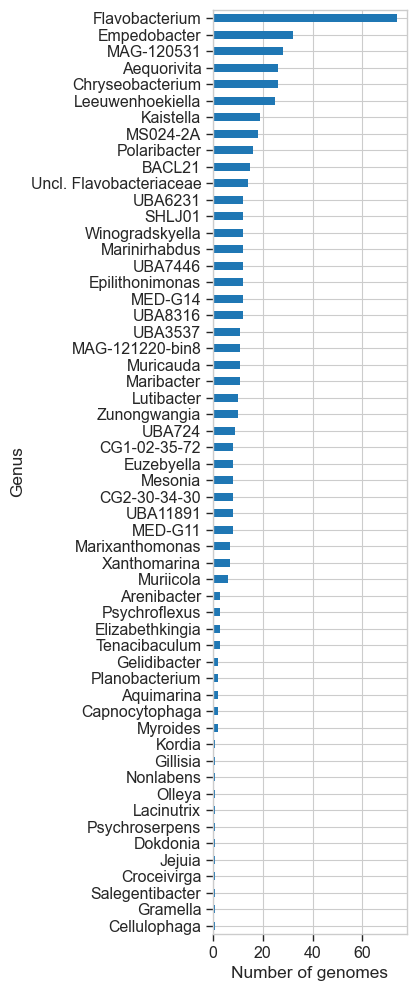

In [32]:
sns.set_style({'font.family': 'Arial'})
#sns.set(style="white")
sns.set_context("paper", font_scale=1.3) 

ax = dataset_reduced[dataset_reduced["MAG"]== True]["Genus"].value_counts().sort_values(ascending=True).plot(kind="barh", figsize=(2.5, 12))
ax.set_xlabel("Number of genomes")
ax.set_ylabel("Genus")

fig = ax.get_figure()
fig.savefig("MAGs_per_genus.pdf", dpi=300, bbox_inches='tight')

### Host

In [34]:
dataset[dataset["MAG"]== True]["Host"].value_counts()

Plankton                           11
Vazella pourtalesii                 5
Tursiops truncatus                  3
Populus alba                        3
Asterionella formosa bg1            2
                                   ..
Skeletonema marinoi strain st54     1
Ephydatia muelleri                  1
Cucumis sativus                     1
Anopheles coluzzii                  1
Sargassum sp.                       1
Name: Host, Length: 16, dtype: int64

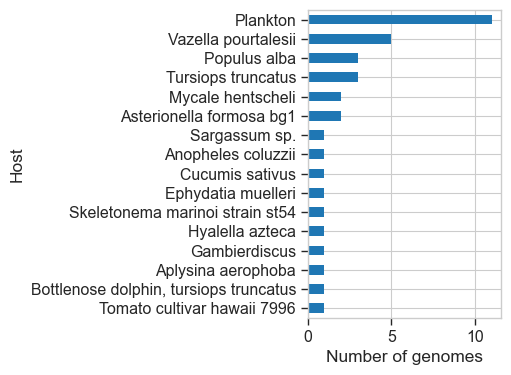

In [35]:
sns.set_style({'font.family': 'Arial'})
#sns.set(style="white")
sns.set_context("paper", font_scale=1.3)

ax = dataset[dataset["MAG"]== True]["Host"].value_counts().sort_values(ascending=True).plot(kind="barh", figsize=(2.5, 4))
ax.set_xlabel("Number of genomes")
ax.set_ylabel("Host")


fig = ax.get_figure()
fig.savefig("MAGs_per_host.pdf", dpi=300, bbox_inches='tight')